In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Building Multimodal Google Nest Concierge / Support Agent with Langchain and Vertex AI Reasoning Engine

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/retrieval_augmented_generation/diy_rag_with_vertexai/build_your_own_grounded_rag_with_vertexai_apis_for_rag.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fretrieval_augmented_generation%2Fdiy_rag_with_vertexai%2Fbuild_your_own_grounded_rag_with_vertexai_apis_for_rag.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/retrieval_augmented_generation/diy_rag_with_vertexai/build_your_own_grounded_rag_with_vertexai_apis_for_rag.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/retrieval_augmented_generation/diy_rag_with_vertexai/build_your_own_grounded_rag_with_vertexai_apis_for_rag.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>

| | |
|-|-|
| Author(s) | [Abhishek Bhagwat](https://github.com/Abhishekbhagwat)|
| Reviewer(s) | [Rajesh Thallam](https://github.com/RajeshThallam)|
| Last updated | 2024-09-27 |

# 📌 Overview

This is a notebook that showcases how to build a **multimodal agent with LangChain** and deploy this agent as an application using **Vertex Reasoning Engine**

Here's how it works:

1. Share a short clip of the tech trauma. 🎥 Blinking Chromecast? Confused thermostat? We got you.
2. Nest Concierge does its detective thing. 🕵️‍♀️ We'll analyze the sitch faster than you can say "Hey Google."
3. Bam! Problem solved! ✨ Easy-peasy instructions, straight from the Google Nest gurus (aka Gemini 😉).
4. Become a tech whisperer! 🤯 Impress everyone with your newfound skills.

Ready to ditch the tech tantrums? Upload your video and let's roll! 🚀

In addition to Vertex AI Agent API, this notebook uses [Vertex AI Search](https://cloud.google.com/generative-ai-app-builder/docs/enterprise-search-introduction) and [ Function Calling](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/function-calling)

---

# 🎬 Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started).


### Google Cloud Permissions

**To run the complete Notebook, including the optional section, you will need to have the [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project.**

If you want to skip the optional section, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access):
* **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
* **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
* **`roles/aiplatform.user`** to use AI Platform components
* **`roles/storage.objectAdmin`** to modify and delete GCS buckets
* **`roles/documentai.admin`** to create and use Document AI Processors
* **`roles/discoveryengine.admin`** to modify discoveryengine assets

### Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com).
1. [Enable the Cloud Document AI API](https://console.cloud.google.com/flows/enableapi?apiid=documentai.googleapis.com).
1. [Enable the Discovery Engine API for your project](https://console.cloud.google.com/marketplace/product/google/discoveryengine.googleapis.com).

### Install Vertex AI SDK and Other Required Packages

In [1]:
!pip install google-cloud-aiplatform[reasoningengine,langchain] google-cloud-discoveryengine langchain-google-vertexai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.

### Restart Runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [1]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>

### Authenticate

If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). In many cases, running `gcloud auth application-default login` in a shell on the machine running the notebook kernel is sufficient.

More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [1]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user(project_id="abhishekbhgwt-llm")
    print("Authenticated")

Authenticated


### Set Google Cloud project information and Initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

Make sure to change `PROJECT_ID` in the next cell. You can leave the values for `REGION` unless you have a specific reason to change them.

In [2]:
from typing import List

import vertexai
from google.api_core.client_options import ClientOptions
from google.cloud import discoveryengine_v1 as discoveryengine
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_google_vertexai import (ChatVertexAI, HarmBlockThreshold,
                                       HarmCategory)
from vertexai.preview import reasoning_engines
from vertexai.preview.generative_models import ToolConfig

PROJECT_ID = ""  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}
STAGING_BUCKET = ""  # @param {type:"string"}

vertexai.init(project=PROJECT_ID, location=REGION, staging_bucket=STAGING_BUCKET)

print("Vertex AI SDK initialized.")
print(f"Vertex AI SDK version = {vertexai.__version__}")
print(f"Discovery Engine API version = {discoveryengine.__version__}")

Vertex AI SDK initialized.
Vertex AI SDK version = 1.67.1
Discovery Engine API version = 0.12.2


Variables for Vertex Search

Uncomment the variables below if you would like to create a Vertex Search datastore and search application. If you already have an app with the datastore - you can plug in those below as well.

In [3]:
VS_LOCATION_ID = "global"  # @param {type:"string"}

# uncomment to use existing search engine application and datastore
# SEARCH_ENGINE_ID = "agents-nest-search-app_1721222008273" # @param {type:"string"}
# DATA_STORE_ID = "nest-kb-datastore-digital-parser_1721221845697" # @param {type:"string"}

# uncomment to create new search engine application and datastore
DATA_STORE_ID = "google_nest_support_datastore_v1"
SEARCH_ENGINE_ID = "google_nest_support_search_engine_v1"

DATASET_GCS_BUCKET_NAME = ""
DATASET_GCS_BUCKET_FOLDER_PATH = ""
DATASET_FILES = f"gs://{DATASET_GCS_BUCKET_NAME}/{DATASET_GCS_BUCKET_FOLDER_PATH}*.html"

## Setup Agent Tools


#### [OPTIONAL] VAIS Helper functions

Use these helper functions to programatically:
1. Create a Vertex AI Search Datastore
2. Import Google Nest support website pages into the datastore
3. Create a search engine and attach the datastore to the engine

In [6]:
from google.cloud import discoveryengine


def create_data_store(
    project_id: str,
    location: str,
    data_store_id: str,
) -> str:
    #  For more information, refer to:
    # https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )

    # Create a client
    client = discoveryengine.DataStoreServiceClient(client_options=client_options)

    # The full resource name of the collection
    # e.g. projects/{project}/locations/{location}/collections/default_collection
    parent = client.collection_path(
        project=project_id,
        location=location,
        collection="default_collection",
    )

    data_store = discoveryengine.DataStore(
        display_name="Google Nest Support Datastore",
        industry_vertical=discoveryengine.IndustryVertical.GENERIC,
        solution_types=[discoveryengine.SolutionType.SOLUTION_TYPE_SEARCH],
        content_config=discoveryengine.DataStore.ContentConfig.CONTENT_REQUIRED,
    )

    request = discoveryengine.CreateDataStoreRequest(
        parent=parent,
        data_store_id=data_store_id,
        data_store=data_store,
    )

    # Make the request
    operation = client.create_data_store(request=request)

    print(f"Waiting for operation to complete: {operation.operation.name}")
    response = operation.result()

    # After the operation is complete,
    # get information from operation metadata
    metadata = discoveryengine.CreateDataStoreMetadata(operation.metadata)

    # Handle the response
    print(response)
    print(metadata)

    return operation.operation.name


def import_documents_into_datastore(
    project_id: str, location: str, data_store_id: str, gcs_uri: str
):

    #  For more information, refer to:
    # https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )

    # Create a client
    client = discoveryengine.DocumentServiceClient(client_options=client_options)

    # The full resource name of the search engine branch.
    # e.g. projects/{project}/locations/{location}/dataStores/{data_store_id}/branches/{branch}
    parent = client.branch_path(
        project=project_id,
        location=location,
        data_store=data_store_id,
        branch="default_branch",
    )

    request = discoveryengine.ImportDocumentsRequest(
        parent=parent,
        gcs_source=discoveryengine.GcsSource(
            # Multiple URIs are supported
            input_uris=[gcs_uri],
            # Options:
            # - `content` - Unstructured documents (PDF, HTML, DOC, TXT, PPTX)
            # - `custom` - Unstructured documents with JSONL metadata
            # - `csv` - Unstructured documents with CSV metadata
            data_schema="content",
        ),
        # Options: `FULL`, `INCREMENTAL`
        reconciliation_mode=discoveryengine.ImportDocumentsRequest.ReconciliationMode.INCREMENTAL,
    )

    # Make the request
    operation = client.import_documents(request=request)

    print(f"Waiting for operation to complete: {operation.operation.name}")
    response = operation.result()

    # After the operation is complete,
    # get information from operation metadata
    metadata = discoveryengine.ImportDocumentsMetadata(operation.metadata)

    # Handle the response
    print(response)
    print(metadata)

    return operation.operation.name


def create_search_application(
    project_id: str, location: str, engine_id: str, data_store_ids: List[str]
) -> str:
    #  For more information, refer to:
    # https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )

    # Create a client
    client = discoveryengine.EngineServiceClient(client_options=client_options)

    # The full resource name of the collection
    # e.g. projects/{project}/locations/{location}/collections/default_collection
    parent = client.collection_path(
        project=project_id,
        location=location,
        collection="default_collection",
    )

    engine = discoveryengine.Engine(
        display_name="Google Nest Support Search Engine",
        # Options: GENERIC, MEDIA, HEALTHCARE_FHIR
        industry_vertical=discoveryengine.IndustryVertical.GENERIC,
        # Options: SOLUTION_TYPE_RECOMMENDATION, SOLUTION_TYPE_SEARCH, SOLUTION_TYPE_CHAT, SOLUTION_TYPE_GENERATIVE_CHAT
        solution_type=discoveryengine.SolutionType.SOLUTION_TYPE_SEARCH,
        # For search apps only
        search_engine_config=discoveryengine.Engine.SearchEngineConfig(
            # Options: SEARCH_TIER_STANDARD, SEARCH_TIER_ENTERPRISE
            search_tier=discoveryengine.SearchTier.SEARCH_TIER_ENTERPRISE,
            # Options: SEARCH_ADD_ON_LLM, SEARCH_ADD_ON_UNSPECIFIED
            search_add_ons=[discoveryengine.SearchAddOn.SEARCH_ADD_ON_LLM],
        ),
        # For generic recommendation apps only
        # similar_documents_config=discoveryengine.Engine.SimilarDocumentsEngineConfig,
        data_store_ids=data_store_ids,
    )

    request = discoveryengine.CreateEngineRequest(
        parent=parent,
        engine=engine,
        engine_id=engine_id,
    )

    # Make the request
    operation = client.create_engine(request=request)

    print(f"Waiting for operation to complete: {operation.operation.name}")
    response = operation.result()

    # After the operation is complete,
    # get information from operation metadata
    metadata = discoveryengine.CreateEngineMetadata(operation.metadata)

    # Handle the response
    print(response)
    print(metadata)

    return operation.operation.name

In [7]:
vs_datastore = create_data_store(
    project_id=PROJECT_ID, location=VS_LOCATION_ID, data_store_id=DATA_STORE_ID
)

search_app = create_search_application(
    project_id=PROJECT_ID,
    location=VS_LOCATION_ID,
    engine_id=SEARCH_ENGINE_ID,
    data_store_ids=[DATA_STORE_ID],
)

documents_import = import_documents_into_datastore(
    project_id=PROJECT_ID,
    location=VS_LOCATION_ID,
    data_store_id=DATA_STORE_ID,
    gcs_uri=DATASET_FILES,
)

Waiting for operation to complete: projects/360429251832/locations/global/collections/default_collection/dataStores/google_nest_support_datastore_v1/branches/0/operations/import-documents-5264131308370802697
error_config {
  gcs_prefix: "gs://360429251832_us_import_content/errors5264131308370801520"
}

create_time {
  seconds: 1727465328
  nanos: 269795000
}
update_time {
  seconds: 1727465331
  nanos: 508172000
}
success_count: 1541
total_count: 1541



### Create output parsers to enforce output schema


In [8]:
class VideoSpec(BaseModel):
    video_description: str = Field(description="Description of the video")
    user_intent: str = Field(description="User intent from the video")


class SearchResultSpec(BaseModel):
    search_results: List[str] = Field(description="List of search results")
    search_answer: str = Field(
        description="LLM Summary Answer based on user search query"
    )


# intialize output parsers
video_spec_json_output_parser = JsonOutputParser(pydantic_object=VideoSpec)
search_result_json_output_parser = JsonOutputParser(pydantic_object=SearchResultSpec)

### 🪛 Tool 1 : `analyse_video`

This tools leverages Gemini's multimodal capabilities to decompose a video and provide detailed understanding about the various objects, scenarios it provides a detailed description about the video

In [9]:
def analyse_video(video_url: str) -> VideoSpec:
    """
    Analyses the video at the specified URL and returns a VideoSpec object.
    This function analyzes the video to understand the user's intent and to understand the video scenario in detail.
    Args:
        video_url (str): The URL of the video to be analyzed.
    Returns:
        VideoSpec: A VideoSpec object containing the user's intent and the video scenario.
    """

    vision_llm = ChatVertexAI(model="gemini-1.5-flash-001", temperature=0.0)

    image_message = {
        "type": "image_url",
        "image_url": {"url": f"{video_url}"},
    }

    text_message = {
        "type": "text",
        "text": """
                You are an expert video analyst. Analyse the video frame by frame to understand the scenario in the video, the various specifications mentioned and the user's intent.
                Feel free to make any reasonable assumptions and describe any measurements based on what you see.
                Always ensure that the description contains the exact product name for the product highlighted in the video. If the user does not identify it, use you knowledge to identify the correct Google product name.
                The product categories that you will be handling would be mostly Google Nest devices, Google Chromecast and Pixel Tablets.
                Provide the breakdown in a JSON format of {"video_description": , "user_intent": }
                """,
    }

    message = HumanMessage(content=[text_message, image_message])
    output = vision_llm.invoke([message])

    return video_spec_json_output_parser.invoke(output)

### 🔧 Tool 2 : `create_search_query`

This tool assists the agent to rewrite an existing query into a specific, clear search query from a complex descriptive query.

In [10]:
def create_search_query(video_description: str, user_intent: str) -> str:
    """
    Generate an optimized search query based on a video description and user intent.
    This method creates a precise search query by considering the details provided in the video description and the user's intent.
    The generated search query aims to capture all the necessary information to provide the most relevant search results.
    Args:
        video_description (str): A detailed description of the video content, including visual elements, objects, actions, and any other relevant information present in the video.
        user_intent (str): The user's intention or goal when searching for information related to the video. This provides context for generating a search query that aligns with the user's needs.
    Returns:
        str: The optimized search query generated based on the provided video description and user intent.
    Example:
    --------
    create_search_query(
        video_description="The video shows a wall with a textured pattern. There are four holes in the wall, likely from nails or screws. A man's hand with a pointing finger is visible in the frame, indicating each hole. The holes appear to be relatively small, less than half an inch in diameter based on the finger size.",
        user_intent="The user is seeking information on how to repair the drywall holes shown in the video.")
    """

    text_llm = ChatVertexAI(model="gemini-1.5-flash-001", temperature=0.0)

    text_message = {
        "type": "text",
        "text": f"""
                Your task is to write very precise search queries by including all necessary details. Ensure that the search query always contains the product name.
                The product categories that you will be handling are Google Nest devices, Google Chromecast and Pixel Tablets. Based on this knowledge, rewrite the query with the correct product name.
                Write a search query based on the user intent and the video description below:
                Only return 1 optimized search query in plaintext, do not output markdown
                Video Description: {video_description}
                User Intent: {user_intent}

                Optimized Search Query:
                """,
    }

    message = HumanMessage(content=[text_message])
    output = text_llm.invoke([message])
    return output.content

### ⛏️ Tool 3: `search_user_guide`

This tool assists the agent to search the Google Nest Support documentation based on the agent's query to provide a specific step by step answer to resolve the user query.

In [23]:
def search_knowledge_with_vertex_ai_search(
    search_query: str,
) -> List[discoveryengine.SearchResponse]:
    """
    Execute a Vertex AI Search for any given query and return the results.
    This function performs a search using the Vertex AI Search API with the provided search query.
    It configures various search parameters such as content search specifications, query expansion,
    and spell correction to optimize the search results.
    Args:
        search_query (str): The search query to be executed.
    Returns:
        List[discoveryengine.SearchResponse]: A list containing the search response objects
        from the Vertex AI Search API.
    Example:
    --------
    search_knowledge_with_vertex_ai_search("How to set up Google Nest Hub")
    """
    client_options = (
        ClientOptions(api_endpoint=f"{VS_LOCATION_ID}-discoveryengine.googleapis.com")
        if VS_LOCATION_ID != "global"
        else None
    )
    client = discoveryengine.SearchServiceClient(client_options=client_options)

    serving_config = f"projects/{PROJECT_ID}/locations/{VS_LOCATION_ID}/collections/default_collection/engines/{SEARCH_ENGINE_ID}/servingConfigs/default_config"
    content_search_spec = discoveryengine.SearchRequest.ContentSearchSpec(
        snippet_spec=discoveryengine.SearchRequest.ContentSearchSpec.SnippetSpec(
            return_snippet=True
        ),
        extractive_content_spec=discoveryengine.SearchRequest.ContentSearchSpec.ExtractiveContentSpec(
            max_extractive_answer_count=1
        ),
        summary_spec=discoveryengine.SearchRequest.ContentSearchSpec.SummarySpec(
            summary_result_count=5,
            include_citations=True,
            ignore_adversarial_query=True,
            # model_prompt_spec=discoveryengine.SearchRequest.ContentSearchSpec.SummarySpec.ModelPromptSpec(
            #     preamble="Give a very detailed answer step by step"
            # ),
            model_spec=discoveryengine.SearchRequest.ContentSearchSpec.SummarySpec.ModelSpec(
                version="gemini-1.5-flash-001/answer_gen/v2",
            ),
        ),
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
        page_size=10,
        content_search_spec=content_search_spec,
        query_expansion_spec=discoveryengine.SearchRequest.QueryExpansionSpec(
            condition=discoveryengine.SearchRequest.QueryExpansionSpec.Condition.AUTO,
        ),
        spell_correction_spec=discoveryengine.SearchRequest.SpellCorrectionSpec(
            mode=discoveryengine.SearchRequest.SpellCorrectionSpec.Mode.AUTO
        ),
    )

    response = client.search(request)
    return response


def search_user_guide(user_query: str) -> str:
    """
    Searches the data store to answer the user's query using Vertex AI Search and returns a summary answer with references.
    Args:
        user_query: The user's search query.
    Returns:
        A dictionary containing the summary answer and a list of references.
    Example:
        >>> search_user_guide("how do I fix a drywall with holes")
        {'summary_answer': 'To fix holes in drywall, you will need to assess the damage, gather necessary materials such as joint compound, drywall tape, and sandpaper, prepare the surface, apply joint compound, apply drywall tape, let it dry, sand the area, and repeat the process as needed for larger holes.', 'references': [{'How to Repair Drywall | Lowe's': 'https://www.lowes.com/n/how-to/repair-drywall'}]}
    """

    result = search_knowledge_with_vertex_ai_search(user_query)

    gen_answer = result.summary.summary_text

    references = []
    for sr in result.results:
        links = {}
        links[
            sr.document.derived_struct_data.get("title")
        ] = sr.document.derived_struct_data.get("link")
        references.append(links)

    response_dict = {"summary_answer": gen_answer, "references": references}
    print(response_dict)

    return response_dict

## Create the Agent

Let's now go ahead and create the langchain agent and attach the different tools we created above to it.

In order to run the agent locally, we make use of Vertex Reasoning Engine's `LangchainAgent` prebuilt template.

(NOTE: You may also choose to use your own framework or template here instead of LangChain. In order to support your own custom framework or template in Reasoning Engine, please refer to [this](https://cloud.google.com/vertex-ai/generative-ai/docs/reasoning-engine/customize).)

### Step 1: Create an agent steering system prompt

We will provide the agent a **steering prompt** in order to help guide it on run the particular set of tasks once a user has provided a video of their problem.

In [24]:
system = """
You are an expert support agent for Google Nest and Chromecast. Your task is to assist the user in resolving their issues using the Google Knowledge Base.

<VIDEO>
{input}
</VIDEO>

Use the tools available to you to execute the following instructions
Only invoke functions using code or plaintext. do not use markdown.

<INSTRUCTIONS>
1. Analyse the <VIDEO> provided by the user.
2. Based on the user intent and the video description, create a search query.
3. Based on the search query, search the datastore to get the answer for the search query
4. Present the final answer from the datastore completely in a step by step manner and show the relevant links for the search query. If there are any relevant products, always show the products. You answer must always have - Generative Answer and the links with the title in markdown format.
</INSTRUCTIONS>

Generative Answer:
"""

system_prompt = PromptTemplate.from_template(system)

### Step 2: Initialize the LLM and associated config

We will now initialize the LLM (Gemini 1.5 Pro) and the associated configs to it.

In [25]:
model = "gemini-1.5-flash-001"
safety_settings = {
    HarmCategory.HARM_CATEGORY_UNSPECIFIED: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
}

# setup forced function calling to reduce hallucinations on function calls.
tool_config = ToolConfig(
    function_calling_config=ToolConfig.FunctionCallingConfig(
        mode=ToolConfig.FunctionCallingConfig.Mode.ANY,
        allowed_function_names=[
            "analyse_video",
            "create_search_query",
            "search_user_guide",
        ],
    )
)

model_kwargs = {
    "temperature": 0.0,
    "max_output_tokens": 8000,
    "top_p": 0.95,
    "top_k": 40,
    "safety_settings": safety_settings,
    "tool_config": tool_config,
}

### Step 3: Create `LangchainAgent` and attach the tools to the agent

We will use the Vertex Reasoning Engine prebuilt agent template - `LangchainAgent` to create and run this agent locally.

Additionally, we also:
1. Attach the tools created in the above section to let the agent know that it can call any of the available tools in order to solve the user task.

2. Enable Tracing - We use Google Cloud Trace which collects the events from the agent and logs them in Google Cloud. This allows you to debug the agent runs in detail to understand and evaluate agent performance.

In [26]:
tools = [analyse_video, create_search_query, search_user_guide]

agent = reasoning_engines.LangchainAgent(
    model=model,  # Required.
    tools=tools,
    model_kwargs=model_kwargs,  # Optional. See "Configure Model"
    agent_executor_kwargs={
        "return_intermediate_steps": True,
        "verbose": True,
    },
    enable_tracing=True,
)

### Step 4: Run the agent locally


In [30]:
INPUT_VIDEO_GCS_URI = ""
response = agent.query(input=system_prompt.format(input=INPUT_VIDEO_GCS_URI))



> Entering new AgentExecutor chain...

Invoking: `analyse_video` with `{'video_url': 'gs://abhishekbhgwt-llm-videos/1000002727.mp4'}`


{'video_description': 'The video shows a hand holding a Google TV remote. The remote is light blue in color and has a circular button in the center, a microphone button on the top left, a back button on the top right, a volume button on the top, a Netflix button on the right, a YouTube button on the bottom right, a rewind button on the bottom left, a play/pause button in the center, and a down arrow button on the bottom left. The user is asking how to change the shortcut keys on the remote from YouTube to YouTube TV.', 'user_intent': 'The user wants to know how to change the shortcut keys on the Google TV remote from YouTube to YouTube TV.'}
Invoking: `create_search_query` with `{'video_description': 'The video shows a hand holding a Google TV remote. The remote is light blue in color and has a circular button in the center, a microphone button on th

We can observe the response object to see the input, output and the intermediate_steps of each individual tool call to understand the reasoning on how the agent created the final answer.


In [31]:
response

{'input': '\nYou are an expert support agent for Google Nest and Chromecast. Your task is to assist the user in resolving their issues using the Google Knowledge Base.\n\n<VIDEO>\ngs://abhishekbhgwt-llm-videos/1000002727.mp4\n</VIDEO>\n\nUse the tools available to you to execute the following instructions\nOnly invoke functions using code or plaintext. do not use markdown.\n\n<INSTRUCTIONS>\n1. Analyse the <VIDEO> provided by the user.\n2. Based on the user intent and the video description, create a search query.\n3. Based on the search query, search the datastore to get the answer for the search query\n4. Present the final answer from the datastore completely in a step by step manner and show the relevant links for the search query. If there are any relevant products, always show the products. You answer must always have - Generative Answer and the links with the title in markdown format.\n</INSTRUCTIONS>\n\nGenerative Answer:\n',
 'output': 'Generative Answer: To change the YouTube b

### View the agent response

In [32]:
from IPython.display import Markdown

markdown_text = Markdown(response["output"])
display(markdown_text)

Generative Answer: To change the YouTube button on your Chromecast Voice Remote to open a different YouTube app, press and hold the button until your YouTube apps appear on your TV screen. Then, select the app you want. 

- [Move and rearrange Google TV screen apps with your remote - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_12390692�hl=en&ref_topic=10089023.html)
- [Use parental controls on Google TV - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_10070481�hl=en&ref_topic=10089023.html)
- [Set up Chromecast with Google TV and remote using TalkBack - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_10092687�hl=en&ref_topic=10089023.html)
- [Play YouTube TV using your speaker or display & Chromecast - Android - Google Nest Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_googlenest_answer_7529864�hl=en&ref_topic=7029584.html)
- [Play YouTube TV on Chromecast with Google TV - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_10115137�hl=en&ref_topic=10089023.html)
- [Pick a preferred TV or speaker for video and audio playback - Android - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_7532812�hl=en&ref_topic=7670719.html)
- [Pick a preferred TV or speaker for video and audio playback - Android - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_7532812.html)
- [Use your phone as a virtual remote control - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_11221499�hl=en&ref_topic=10089023.html)
- [Meet Chromecast with Google TV - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_12578818�hl=en&ref_topic=10089023.html)
- [Play YouTube videos on Chromecast-enabled TVs with your speaker or display - Android - Chromecast Help](gs://nest-kb-source-docs/nest-kb-source-docs-agents/support.google.com_chromecast_answer_7029380�hl=en&ref_topic=7670719.html) 


### Observe the Agent Execution Trace
Reasoning Engine support execution tracing with OTEL integrated with Cloud Trace. The trace for the run above is as shown below.

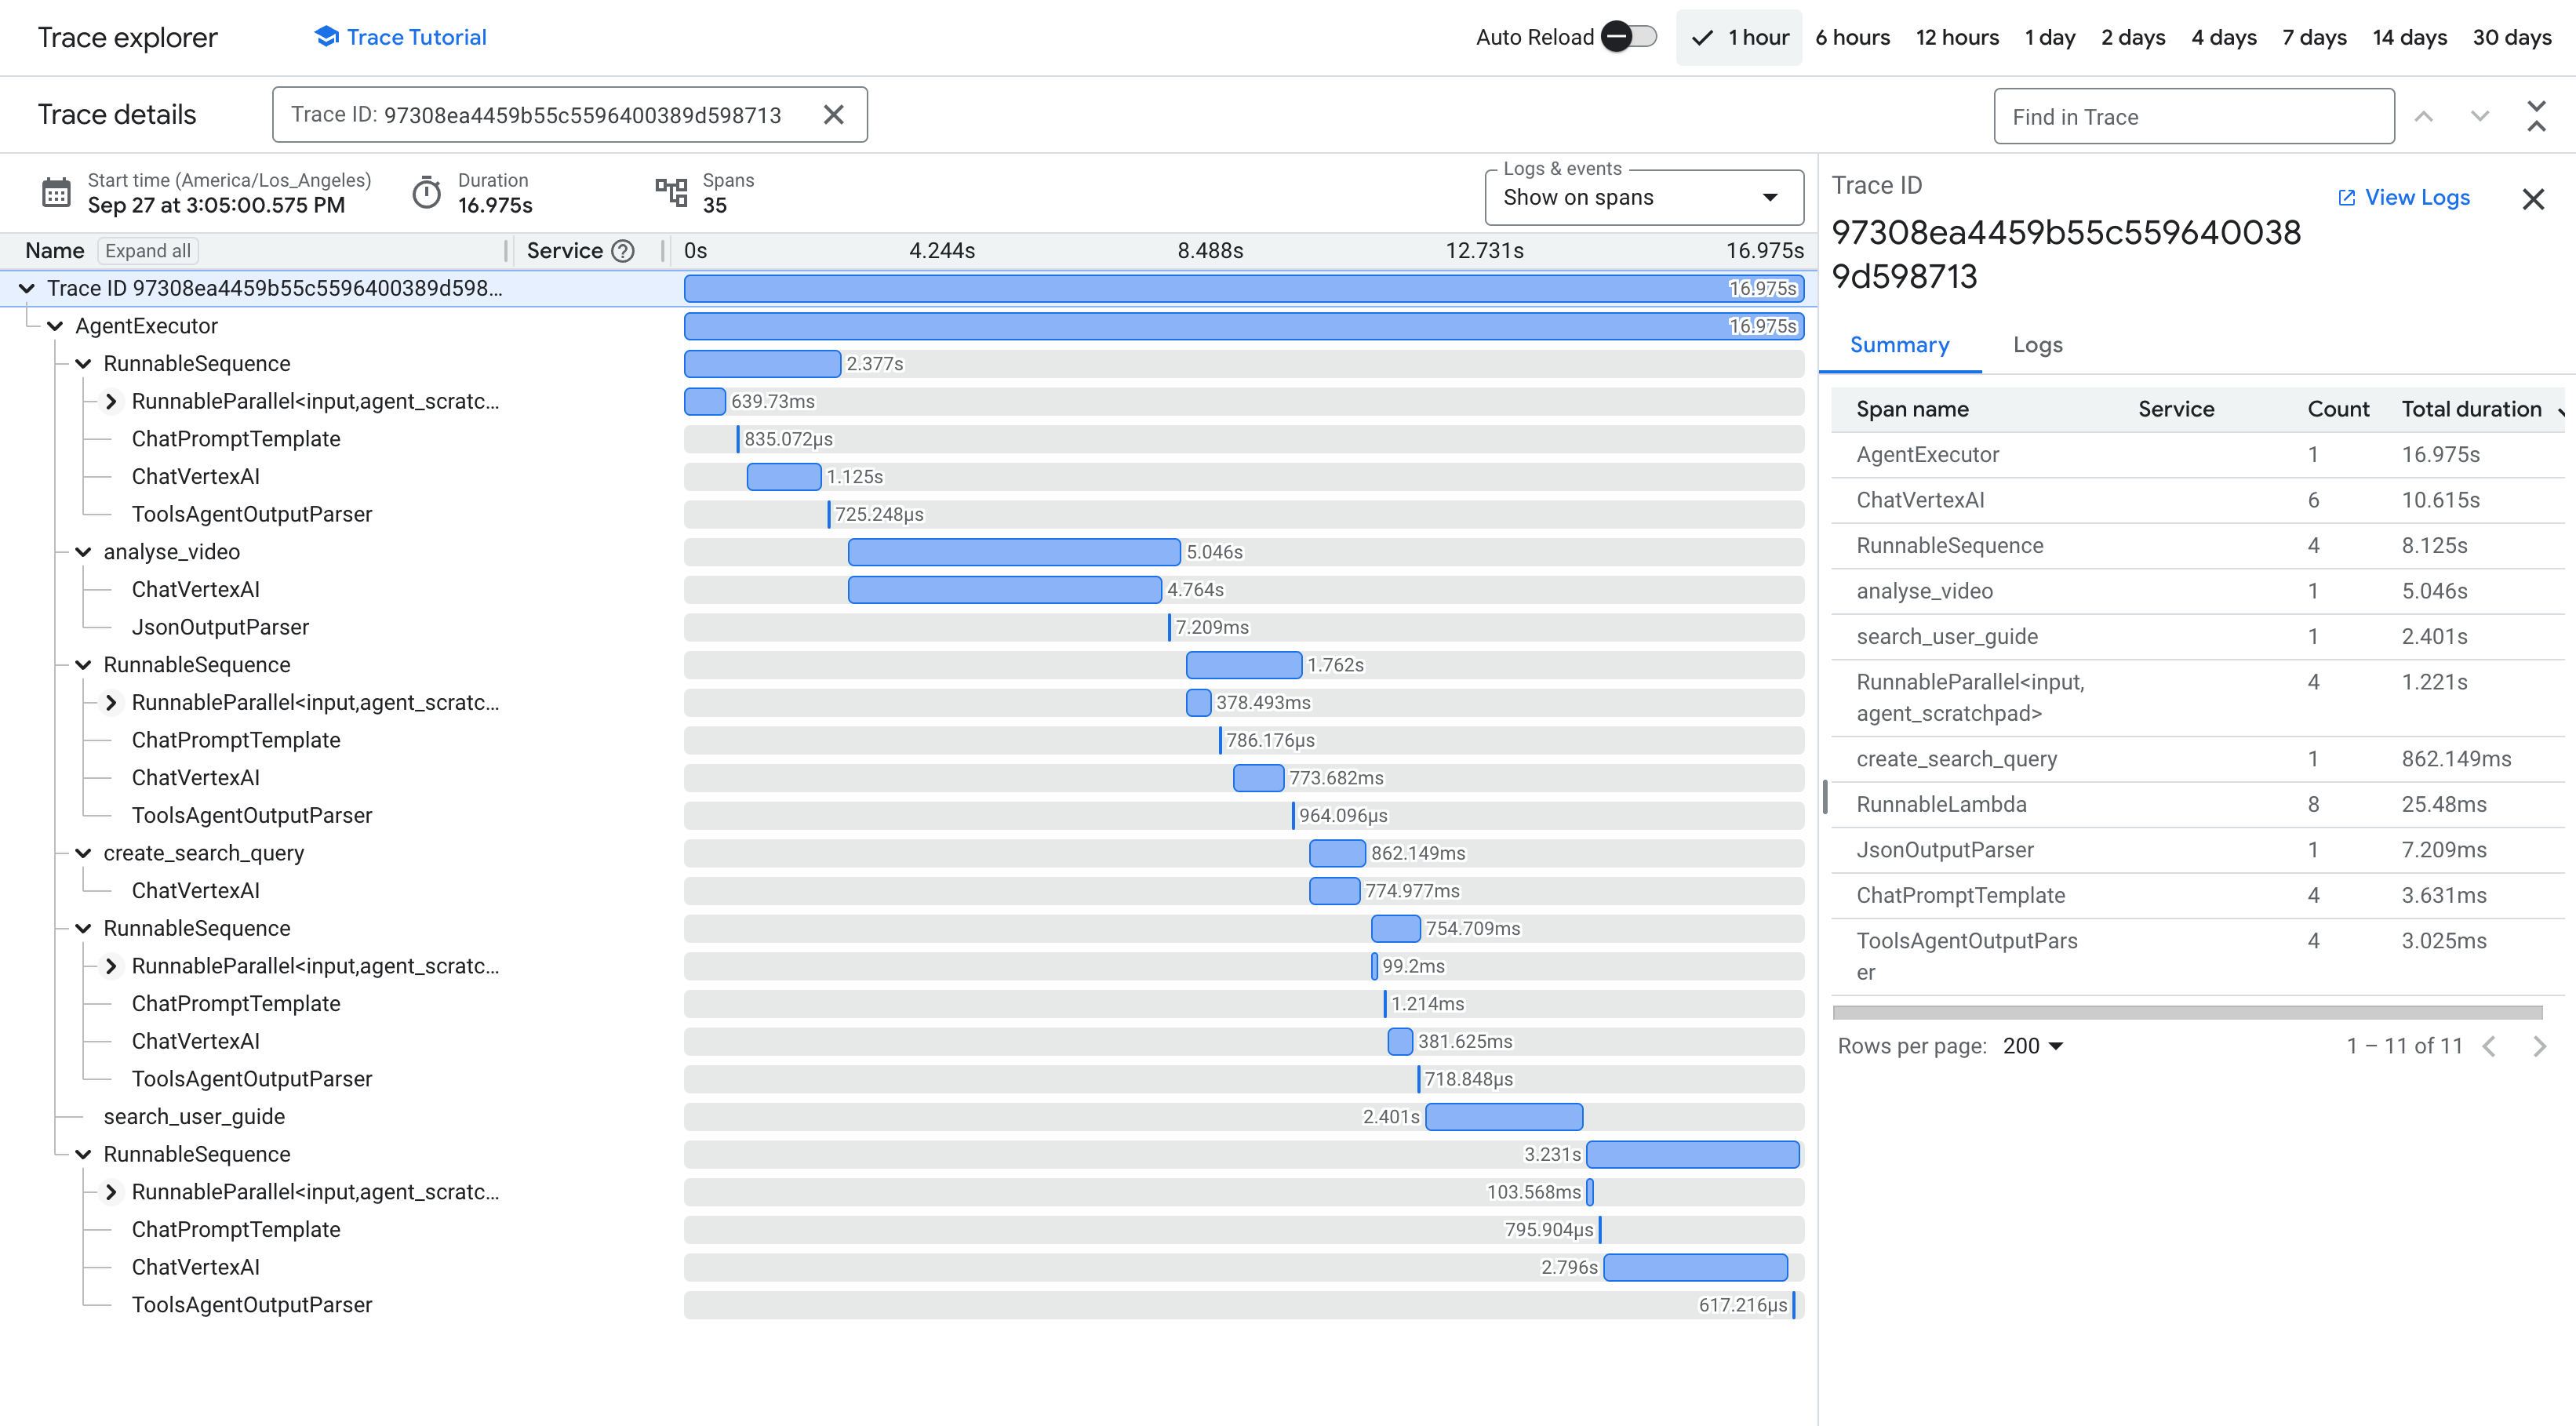

## Deploying the agent on Vertex Reasoning Engine


### [OPTIONAL] Step 0: Provision IAM access to Reasoning Engine Service Account

In [33]:
from googleapiclient import discovery

service = discovery.build("cloudresourcemanager", "v1")
request = service.projects().get(projectId=PROJECT_ID)
response = request.execute()
project_number = response["projectNumber"]
project_number

'360429251832'

In [34]:
!gcloud projects add-iam-policy-binding {PROJECT_ID} \
    --member=serviceAccount:service-{project_number}@gcp-sa-aiplatform-re.iam.gserviceaccount.com \
    --role=roles/discoveryengine.editor

Updated IAM policy for project [abhishekbhgwt-llm].
bindings:
- members:
  - serviceAccount:360429251832-compute@developer.gserviceaccount.com
  - serviceAccount:llm-chandrika@abhishekbhgwt-llm.iam.gserviceaccount.com
  role: roles/aiplatform.admin
- members:
  - serviceAccount:service-360429251832@gcp-sa-aiplatform-cc.iam.gserviceaccount.com
  role: roles/aiplatform.customCodeServiceAgent
- members:
  - serviceAccount:service-360429251832@gcp-sa-vertex-ex-cc.iam.gserviceaccount.com
  role: roles/aiplatform.extensionCustomCodeServiceAgent
- members:
  - serviceAccount:service-360429251832@gcp-sa-autopush-vertex-ex.iam.gserviceaccount.com
  - serviceAccount:service-360429251832@gcp-sa-vertex-ex.iam.gserviceaccount.com
  role: roles/aiplatform.extensionServiceAgent
- members:
  - serviceAccount:service-360429251832@gcp-sa-aiplatform-vm.iam.gserviceaccount.com
  role: roles/aiplatform.notebookServiceAgent
- members:
  - serviceAccount:service-360429251832@gcp-sa-vertex-rag.iam.gserviceacc

### Step 1: Create a Reasoning Engine Deployment

Create a Reasoning Engine Deployment using the local agent created above along with all the dependencies needed to run the agent

In [ ]:
remote_agent = reasoning_engines.ReasoningEngine.create(
    agent,
    requirements=[
        "google-cloud-aiplatform[langchain,reasoningengine]",
        "cloudpickle==3.0.0",
        "pydantic==2.7.4",
        "langchain-google-community",
        "google-cloud-discoveryengine",
        "langchain-google-vertexai",
    ],
)

### Step 2: Initialize Deployed Reasoning Engine Agent

Initialize the deployed reasoning engine agent using the remote agent URL in the above cell

In [37]:
remote_agent = vertexai.preview.reasoning_engines.ReasoningEngine(
    "projects/360429251832/locations/us-central1/reasoningEngines/8265530283294457856"
)

### Step 3: Query the Remote Agent

Query the remote agent similar to how you would query the local agent.

In [38]:
remote_agent.query(input="")

{'intermediate_steps': [[{'lc': 1.0,
    'kwargs': {'tool': 'analyse_video',
     'message_log': [{'kwargs': {'tool_call_chunks': [{'name': 'analyse_video',
          'id': 'e181a8eb-18d0-4004-b59e-a87167260ba8',
          'index': None,
          'args': '{"video_url": "gs://abhishekbhgwt-llm-videos/1000001821.mp4"}',
          'type': 'tool_call_chunk'}],
        'content': '',
        'type': 'AIMessageChunk',
        'usage_metadata': {'output_tokens': 33.0,
         'total_tokens': 621.0,
         'input_tokens': 588.0},
        'tool_calls': [{'id': 'e181a8eb-18d0-4004-b59e-a87167260ba8',
          'type': 'tool_call',
          'args': {'video_url': 'gs://abhishekbhgwt-llm-videos/1000001821.mp4'},
          'name': 'analyse_video'}],
        'response_metadata': {'safety_ratings': [{'blocked': False,
           'severity': 'HARM_SEVERITY_NEGLIGIBLE',
           'probability_label': 'NEGLIGIBLE',
           'category': 'HARM_CATEGORY_HATE_SPEECH'},
          {'severity': 'HARM_SE